## Random Forest

* Classification or Regression
* Discriminative classifier
    * Directly maps inputs --> targets
* Non-parametric
    * Does not assume data follows a specific distribution (e.g. Gaussian)
* Approach
    * Ensemble Method
    * Aggregates predictions of multiple Decision Trees
* Pros
    * Fast training and inference (DT are simple, easy to parallize)
    * Flexible (can fit wide range of distributions)
    * Very little hand tuning of parameters
* Cons
    * Hard to interpret results
    
* https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Decision Trees

* You ask a series of questions designed to zero-in on the classification
* Recursive binary splitting
* You keep splitting until you reach a desired depth/leaf node size

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree.png)

Pros
* Simple and intuitive

Cons
* Overfits

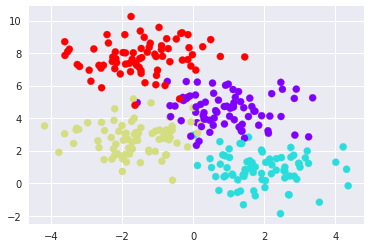

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [6]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/home/bfortuner/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


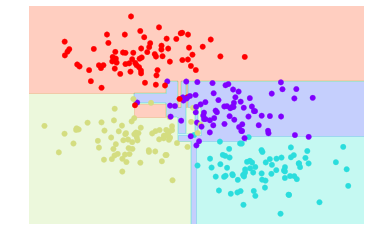

In [8]:
visualize_classifier(DecisionTreeClassifier(), X, y);

### Overfitting

* The deeper the try, the more likely the model will memorize noise
* We can see overfitting by comparing classifications of models trained on different subsets
* As you can see there is high Variance in the model predictions
![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree-overfitting.png)

### Random Forests

* Attempt to solve the overfitting problem by ensembling decision trees!
* Bagging = training on different subsets of the data

/home/bfortuner/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


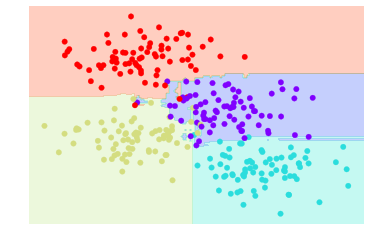

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

### Random Forest Regression

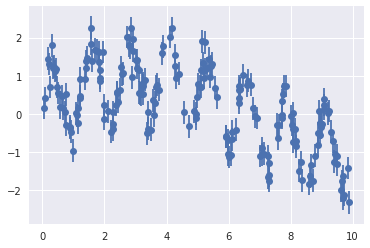

In [10]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

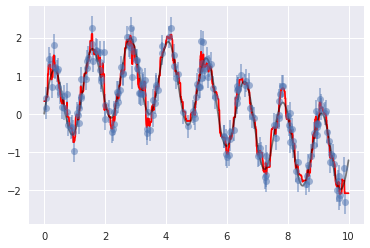

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

### Classifying Images

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [13]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

/home/bfortuner/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.96      0.98      0.97        47
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



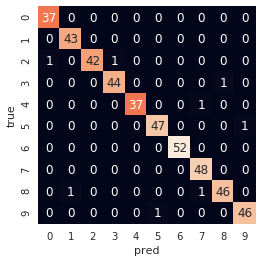

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('pred')
plt.ylabel('true');

### References

* https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
* http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
